<a href="https://colab.research.google.com/github/firebee-ai/Toxic-Comment-Classification-ML-and-DL-/blob/main/Toxic_Comment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"firebee","key":"fffdb68ddcf11205d84580a400890c6c"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle/

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s "toxic comment classification"


ref                                                          title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
julian3833/jigsaw-toxic-comment-classification-challenge     jigsaw-toxic-comment-classification-challenge       53MB  2021-11-11 04:08:25            547  
fizzbuzz/cleaned-toxic-comments                              Cleaned Toxic Comments                              44MB  2018-03-12 05:12:31           2586  
kashnitsky/jigsaw-multilingual-toxic-test-translated         Jigsaw multilingual toxic - test & val translated   25MB  2020-03-30 16:04:03            605  
miklgr500/jigsaw-train-multilingual-coments-google-api       Jigsaw Train Multilingual Coments (Google API)     500MB  2020-04-06 13:44:59           1125  
nicapotato/bad-bad-words                                     Bad

In [ ]:
!kaggle datasets download julian3833/jigsaw-toxic-comment-classification-challenge
%cd ..

 77% 41.0M/53.4M [00:00<00:00, 72.0MB/s]
100% 53.4M/53.4M [00:00<00:00, 108MB/s] 
/


In [ ]:
!unzip /content/jigsaw-toxic-comment-classification-challenge.zip -d toxic_city

Archive:  /content/jigsaw-toxic-comment-classification-challenge.zip
  inflating: toxic_city/sample_submission.csv  
  inflating: toxic_city/test.csv     
  inflating: toxic_city/test_labels.csv  
  inflating: toxic_city/train.csv    


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import re
import nltk
import string
import nlp_utils
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [ ]:
pip install contractions


     |████████████████████████████████| 284 kB 7.2 MB/s 
     |████████████████████████████████| 321 kB 53.0 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85453 sha256=4d0200b626aac48ce74af333880561e6b751e4100e231ae6bec8f1dbcfb9c171
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
df=pd.read_csv('/toxic_city/train.csv') 


0         False
1         False
2         False
3         False
4         False
          ...  
159566    False
159567    False
159568    False
159569    False
159570    False
Name: toxic, Length: 159571, dtype: bool

In [ ]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [ ]:
df['insult'].value_counts()

0    151694
1      7877
Name: insult, dtype: int64

In [ ]:
df['obscene'].value_counts()

0    151122
1      8449
Name: obscene, dtype: int64

In [ ]:
df['severe_toxic'].value_counts()

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [ ]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [ ]:
df['identity_hate'].value_counts()

0    158166
1      1405
Name: identity_hate, dtype: int64

In [ ]:
sentencetype_graph=df.iloc[:,2:].sum()              
sentencetype_graph

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

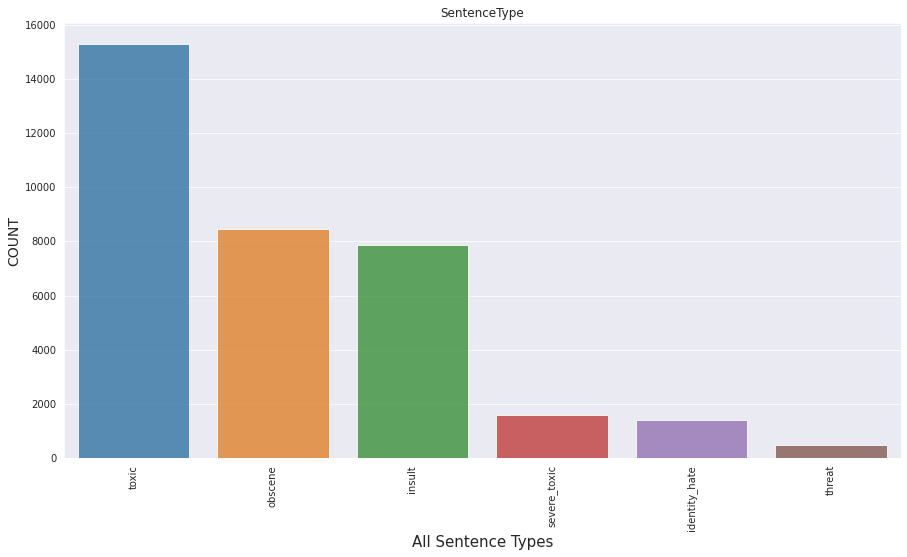

In [ ]:
sns.set_style("darkgrid")
ls=sentencetype_graph.sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8) 
plt.title('SentenceType')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('All Sentence Types', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

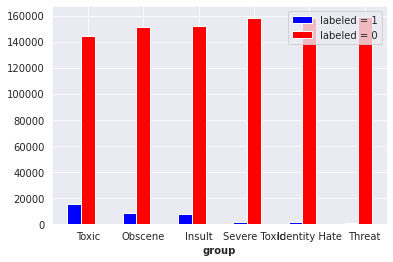

In [ ]:
barWidth = 0.25

bars1 = [sum(df['toxic'] == 1), sum(df['obscene'] == 1), sum(df['insult'] == 1), sum(df['severe_toxic'] == 1),
         sum(df['identity_hate'] == 1), sum(df['threat'] == 1)]
bars2 = [sum(df['toxic'] == 0), sum(df['obscene'] == 0), sum(df['insult'] == 0), sum(df['severe_toxic'] == 0),
         sum(df['identity_hate'] == 0), sum(df['threat'] == 0)]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='blue', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='red', width=barWidth, label='labeled = 0')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate',
                                                       'Threat'])
plt.legend()
plt.show()


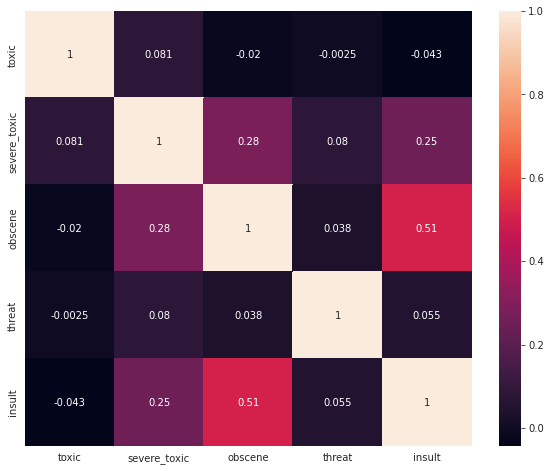

In [ ]:
rowsums = df.iloc[:, 2:].sum(axis=1)
temp = df.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)


In [ ]:
import re
import string

In [ ]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
df['comment_text'] = df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)


In [ ]:
Insulting_comment_df=df.loc[:,['id','comment_text','insult']]
Insulting_comment_df

,id,comment_text,insult
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [ ]:
IdentityHate_comment_df=df.loc[:,['id','comment_text','identity_hate']]
IdentityHate_comment_df

,id,comment_text,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [ ]:
Obscene_comment_df=df.loc[:,['id','comment_text','obscene']]
Obscene_comment_df

,id,comment_text,obscene
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [ ]:
Threatening_comment_df=df.loc[:,['id','comment_text','threat']]
Threatening_comment_df

,id,comment_text,threat
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [ ]:
Severetoxic_comment_df=df.loc[:,['id','comment_text','severe_toxic']]
Severetoxic_comment_df

,id,comment_text,severe_toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [ ]:
Toxic_comment_df=df.loc[:,['id','comment_text','toxic']]
Toxic_comment_df

,id,comment_text,toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [ ]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [ ]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=2000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

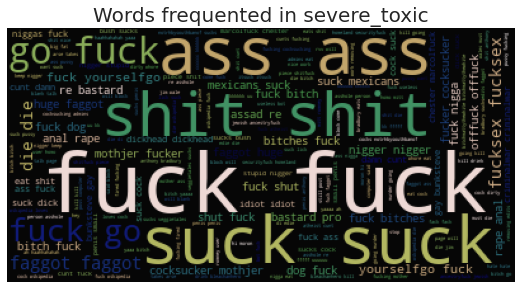

In [ ]:
wordcloud(Severetoxic_comment_df,'severe_toxic')

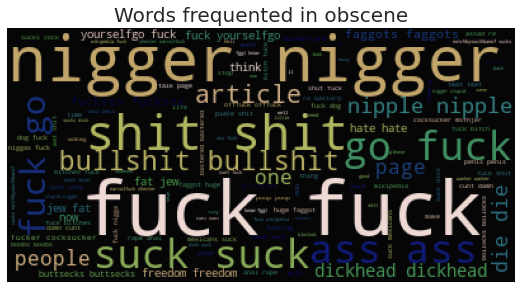

In [ ]:
wordcloud(Obscene_comment_df,'obscene')

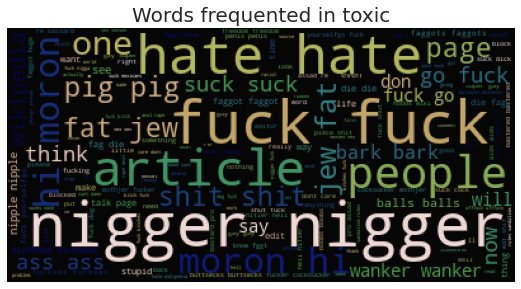

In [ ]:
wordcloud(Toxic_comment_df,'toxic')

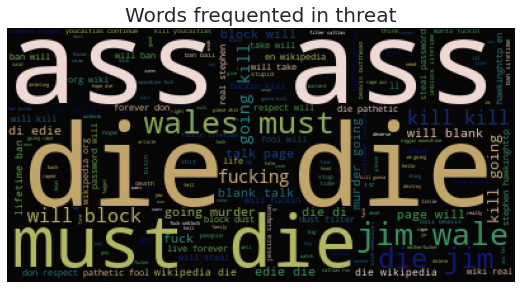

In [ ]:
wordcloud(Threatening_comment_df,'threat')

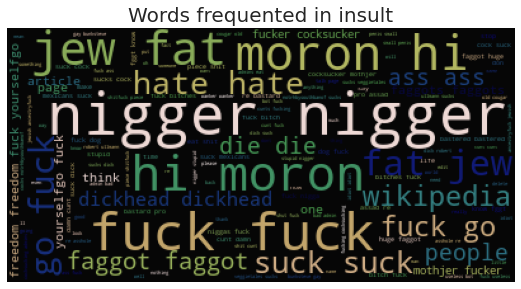

In [ ]:
wordcloud(Insulting_comment_df,'insult')

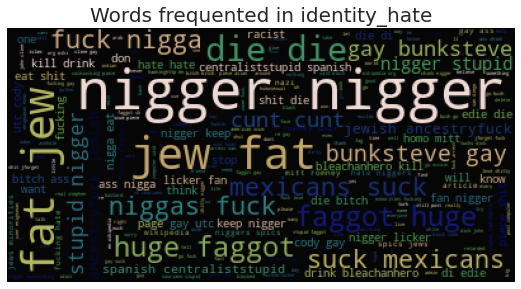

In [ ]:
wordcloud(IdentityHate_comment_df,'identity_hate')

In [ ]:
Toxic_comment_balanced_1 = Toxic_comment_df[Toxic_comment_df['toxic'] == 1].iloc[0:5000,:]


In [ ]:
Toxic_comment_balanced_0 = Toxic_comment_df[Toxic_comment_df['toxic'] == 0].iloc[0:5000,:]


In [ ]:
Toxic_comment_balanced_1.shape


(5000, 3)

In [ ]:
Toxic_comment_balanced_0.shape


(5000, 3)

In [ ]:
Toxic_comment_balanced_1['toxic'].value_counts()


1    5000
Name: toxic, dtype: int64

In [ ]:
Toxic_comment_balanced_0['toxic'].value_counts()


0    5000
Name: toxic, dtype: int64

In [ ]:
Toxic_comment_balanced=pd.concat([Toxic_comment_balanced_1,Toxic_comment_balanced_0])


In [ ]:
Toxic_comment_balanced['toxic'].value_counts()


1    5000
0    5000
Name: toxic, dtype: int64

In [ ]:
Severetoxic_comment_df['severe_toxic'].value_counts()


0    157976
1      1595
Name: severe_toxic, dtype: int64

In [ ]:
Severetoxic_comment_df_1 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 1].iloc[0:1595,:]


In [ ]:
Severetoxic_comment_df_0 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 0].iloc[0:1595,:]


In [ ]:
Severe_toxic_comment_balanced=pd.concat([Severetoxic_comment_df_1,Severetoxic_comment_df_0])


In [ ]:
Severe_toxic_comment_balanced['severe_toxic'].value_counts() 


1    1595
0    1595
Name: severe_toxic, dtype: int64

In [ ]:
Obscene_comment_df['obscene'].value_counts()


0    151122
1      8449
Name: obscene, dtype: int64

In [ ]:
Obscene_comment_df_1 = Obscene_comment_df[Obscene_comment_df['obscene'] == 1].iloc[0:5000,:] 


In [ ]:
Obscene_comment_df_0 = Obscene_comment_df[Obscene_comment_df['obscene'] == 0].iloc[0:5000,:]
Obscene_comment_balanced = pd.concat([Obscene_comment_df_1,Obscene_comment_df_0])
Obscene_comment_balanced['obscene'].value_counts()

1    5000
0    5000
Name: obscene, dtype: int64

In [ ]:
Threatening_comment_df

,id,comment_text,threat
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [ ]:
Threatening_comment_df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [ ]:
Threatening_comment_df_1 = Threatening_comment_df[Threatening_comment_df['threat'] == 1].iloc[0:478,:]
Threatening_comment_df_0 = Threatening_comment_df[Threatening_comment_df['threat'] == 0].iloc[0:478,:]
Threatening_comment_balanced = pd.concat([Threatening_comment_df_1,Threatening_comment_df_0])
Threatening_comment_balanced['threat'].value_counts()

1    478
0    478
Name: threat, dtype: int64

In [ ]:
Threatening_comment_balanced

,id,comment_text,threat
79,003217c3eb469ba9,hi i am back again last warning stop undoin...,1
176,006b94add72ed61c,i think that your a fagget get a oife and burn...,1
600,0199d6af27b715f3,i m also a sock puppet of this account supri...,1
802,02230885017a50c5,fuck you smith please have me notified when ...,1
1017,02c6e41e4b317ac3,wouldn t be the first time bitch fuck you i l...,1
...,...,...,...
475,01389dc7e054bfe5,hello if you re interested we could re...,0
476,013ad5246f4b953b,f k all rides at worlds of fun i hate all ...,0
477,013bd808a6d3d69b,as to job for you sure thing as soon as i ...,0
478,013c1a43411c5f9a,oh ok i just wanted to see what people though...,0


In [ ]:
Insulting_comment_df['insult'].value_counts()

0    151694
1      7877
Name: insult, dtype: int64

In [ ]:
Insulting_comment_df_1 = Insulting_comment_df[Insulting_comment_df['insult'] == 1].iloc[0:5000,:]
Insulting_comment_df_0 = Insulting_comment_df[Insulting_comment_df['insult'] == 0].iloc[0:5000,:]
Insulting_comment_balanced = pd.concat([Insulting_comment_df_1,Insulting_comment_df_0])

In [ ]:
Insulting_comment_balanced['insult'].value_counts()

1    5000
0    5000
Name: insult, dtype: int64

In [ ]:
IdentityHate_comment_df['identity_hate'].value_counts()

0    158166
1      1405
Name: identity_hate, dtype: int64

In [ ]:
IdentityHate_comment_df_1 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 1].iloc[0:1405,:]
IdentityHate_comment_df_0 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 0].iloc[0:1405,:]
IdentityHate_comment_balanced = pd.concat([IdentityHate_comment_df_1,IdentityHate_comment_df_0])

In [ ]:
IdentityHate_comment_balanced['identity_hate'].value_counts()

1    1405
0    1405
Name: identity_hate, dtype: int64

In [ ]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import ngrams,bigrams,trigrams

In [ ]:
def cv_tf_train_test(dataframe,label,vectorizer,ngram):

    # Split the data into X and y data sets
    X = dataframe.comment_text
    y = dataframe[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

    # Using vectorizer and removing stopwords
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    # Transforming x-train and x-test
    X_train_cv1 = cv1.fit_transform(X_train) 
    X_test_cv1  = cv1.transform(X_test)      
    
    ## Machine learning models   
    
    ## Logistic regression
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    
    ## k-nearest neighbours
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    ## Naive Bayes
    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    
    ## Multinomial naive bayes
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    
    ## Support vector machine
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    ## Random Forest 
    randomforest = RandomForestClassifier(n_estimators=100, random_state=50)
    randomforest.fit(X_train_cv1, y_train)
    
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
    ## Saving f1 score results into a dataframe                     
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1

In [ ]:
severe_toxic_comment_cv = cv_tf_train_test(Severe_toxic_comment_balanced, 'severe_toxic', TfidfVectorizer, (1,1))
severe_toxic_comment_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)
severe_toxic_comment_cv


,F1 Score(severe_toxic)
Log Regression,0.940282
KNN,0.860192
BernoulliNB,0.790738
MultinomialNB,0.932377
SVM,0.937901
Random Forest,0.941176


In [ ]:
obscene_comment_cv = cv_tf_train_test(Obscene_comment_balanced, 'obscene', TfidfVectorizer, (1,1))
obscene_comment_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)
obscene_comment_cv


,F1 Score(obscene)
Log Regression,0.901183
KNN,0.625341
BernoulliNB,0.766640
MultinomialNB,0.887496
SVM,0.915613
Random Forest,0.884261


In [ ]:
threat_comment_cv = cv_tf_train_test(Threatening_comment_balanced, 'threat', TfidfVectorizer, (1,1))
threat_comment_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)
threat_comment_cv


,F1 Score(threat)
Log Regression,0.897338
KNN,0.852459
BernoulliNB,0.745205
MultinomialNB,0.902098
SVM,0.894737
Random Forest,0.923077


In [ ]:
insult_comment_cv = cv_tf_train_test(Insulting_comment_balanced, 'insult', TfidfVectorizer, (1,1))
insult_comment_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
insult_comment_cv


,F1 Score(insult)
Log Regression,0.901851
KNN,0.320661
BernoulliNB,0.776986
MultinomialNB,0.896299
SVM,0.906218
Random Forest,0.890821


In [ ]:
identity_hatecomment_cv = cv_tf_train_test(IdentityHate_comment_balanced, 'identity_hate', TfidfVectorizer, (1,1))
identity_hatecomment_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)
identity_hatecomment_cv


,F1 Score(identity_hate)
Log Regression,0.905707
KNN,0.820046
BernoulliNB,0.776699
MultinomialNB,0.903302
SVM,0.896806
Random Forest,0.888087


In [ ]:
X = Toxic_comment_balanced.comment_text
y = Toxic_comment_balanced['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  
X_test_fit = tfv.transform(X_test)  
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
comment1 = ['i killed an insect and ate it']
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]


array([0.73519444])

In [ ]:
comment2 = ['Is this sentence a good one']
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]


array([0.08770635])

In [ ]:
comment2 = ['truth will prevail']
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]


array([0.46238997])

In [ ]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = df[list_classes].values
list_sentences_train = df["comment_text"]


0         explanation why the edits made under my userna...
1         d aww  he matches this background colour i m s...
2         hey man  i m really not trying to edit war  it...
3           more i can t make any real suggestions on im...
4         you  sir  are my hero  any chance you remember...
                                ...                        
159566          and for the second time of asking  when ...
159567    you should be ashamed of yourself   that is a ...
159568    spitzer   umm  theres no actual article for pr...
159569    and it looks like it was actually you who put ...
159570      and     i really don t think you understand ...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers


In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)


In [ ]:
len(list_tokenized_train)


159571

In [ ]:
list_tokenized_train[1]


[161, 15797, 51, 2505, 13, 541, 3595, 3, 70, 4288, 2584, 23, 96, 38, 940, 183]

In [ ]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)


In [ ]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]


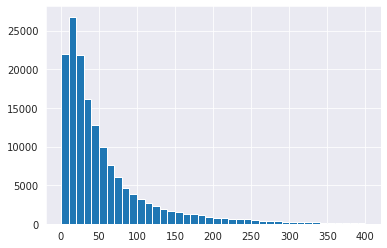

In [ ]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.show()


In [ ]:
inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier


In [ ]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


In [ ]:
batch_size = 32
epochs = 2
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/2
4488/4488 [==============================] - 705s 157ms/step - loss: 0.0389 - accuracy: 0.9800 - val_loss: 0.0464 - val_accuracy: 0.9934
Epoch 2/2
4488/4488 [==============================] - 696s 155ms/step - loss: 0.0341 - accuracy: 0.9737 - val_loss: 0.0505 - val_accuracy: 0.9903


In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           45360     
                                                                 
 global_max_pooling1d (Globa  (None, 60)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                             

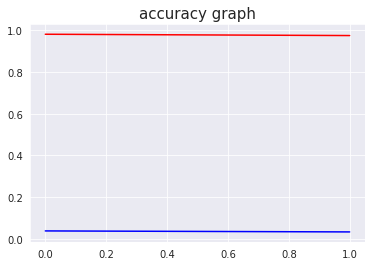